# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [30]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [31]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAP_BOX_KEY")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [82]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
neighborhood_coord_df = pd.read_csv("neighborhoods_coordinates.csv")
neigborhood_coord_df = neighborhood_coord_df.set_index('Neighborhood')


In [36]:
sfo_housing_group

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [75]:
#Housing Units per Year
sfo_housing_group = sfo_data['housing_units'].groupby(['year']).mean()
ymin = sfo_housing_group.min()
ymax = sfo_housing_group.max()
sfo_housing_group

avg_sale_price_gross_rent = sfo_data[["sale_price_sqr_foot","gross_rent"]].groupby(["year"]).mean()
avg_sale_price_gross_rent
#Average Gross Rent
avg_gross_rent_df = avg_sale_price_gross_rent["gross_rent"]

#Average Sale price per SqFt
avg_sale_price_df = avg_sale_price_gross_rent["sale_price_sqr_foot"]

#Average price per neighboor hood
avg_neighborhood_price_df = sfo_data.groupby(["year","neighborhood"]).mean().reset_index().head(10)
avg_neighborhood_price_df

#Top 10 Most Expensive Neighborhoods
top10_neighborhood = sfo_data.groupby('neighborhood').mean()
top_10 = top10_neighborhood.sort_values('sale_price_sqr_foot', ascending=False).reset_index().head(10)
top_10

neigh_coordinates_df = pd.read_csv("neighborhoods_coordinates.csv")
neigh_coordinates_df.head()




,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [96]:
def housing_units_per_year():
    """Housing Units Per Year."""
    housing_units_per_yr = sfo_data['housing_units'].groupby(['year']).mean()
    ymin = housing_units_per_yr.min()
    ymax = housing_units_per_yr.max()
    housing_units_per_yr.plot(ylim=(ymin,ymax),kind="bar")
    return housing_units_per_year

def neighborhood_map():
    """Neighborhood Map."""

    map_box_plot = px.scatter_mapbox(
        neighborhood_coord_df,
        lat="Lat",
        lon="Lon",
        size= "sale_price_sqr_foot",
        color="gross_rent",
        color_continuous_scale=px.colors.cyclical.IceFire,
        title="Average Gross Rent in San Francisco Per Year.",
        hover_name="neighborhood"
        )
    return map_box_plot

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    avg_gross_rent = avg_gross_rent_df.plot(
        x="year",
        y="gross_rent",
        title="Average Gross Rent in San Francisco Per Year.",
    )
    return avg_gross_rent()

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

KeyboardInterrupt: 

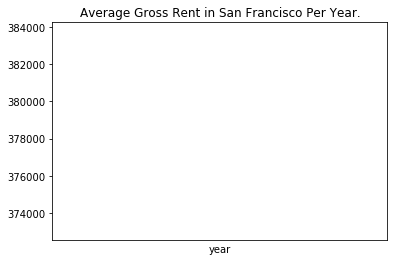

In [95]:
# Create a Title for the Dashboard
title = '# Real Estate Analysis of San Francisco from 2010 to 2016'

# Create a tab layout for the dashboard

sfo_row = pn.Row(housing_units_per_year(), average_gross_rent(),average_sales_price())
sfo_yr_analysis = pn.Column(d)
# Create the dashboard
sfo_dashboard = pn.Tabs(
    ('Welcome', wel_column),
    ('Yearly Market Analysis', sfo_yr_analysis),
    ('Neighborhood Analysis', sfo_neighborhood_analysis),
    ('Parallel Plots Analysis', sfo_parallel_plots),
    ('Sunburst Plot Analysis', sfo_sunburst_analysis))



## Serve the Panel Dashboard

In [ ]:
# Serve the# dashboard
# YOUR CODE HERE!

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

<function __main__.housing_units_per_year()>

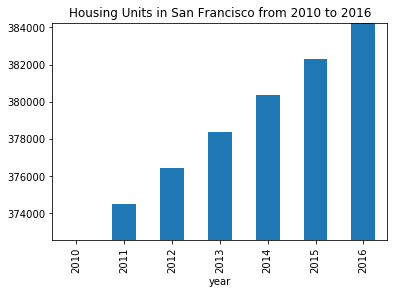

In [56]:
housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [70]:
neighborhood_map.show()

AttributeError: 'function' object has no attribute 'show'

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()

In [ ]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    housing_units_yr = px.scatter_mapbox(
        sfo_housing_group,
        
        size= "year",
        color="index",
        color_continuous_scale=px.colors.cyclical.IceFire,
        title="Housing Units Per Year",
        zoom=12,
        width=1000,
    
    
    
    )

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    avg_gross_rent = px.scatter_mapbox(
        avg_gross_rent_df,
        lat="latitude",
        lon="longitude",
        size= "year",
        color="index",
        color_continuous_scale=px.colors.cyclical.IceFire,
        title="Average Gross Rent in San Francisco Per Year.",
        zoom=12,
        width=1000,
    )
    return avg_gross_rent()
def average_sales_price():
    """Average Sales Price Per Year."""
    
     avg_sale_price = px.scatter_mapbox(
        avg_sale_price_df,
        lat="latitude",
        lon="longitude",
        size= "year",
        color="index",
        color_continuous_scale=px.colors.cyclical.IceFire,
        title="Average Sales Price Per Year.",
        zoom=12,
        width=1000,
     )


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   

    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""


def parallel_categories():
    """Parallel Categories Plot."""
    


def neighborhood_map():
    """Neighborhood Map."""

     map_box_plot = px.scatter_mapbox(
        avg_gross_rent_df,
        lat="latitude",
        lon="longitude",
        "sale_price_sqr_foot",
        "gross_rent",
        color_continuous_scale=px.colors.cyclical.IceFire,
        title="Average Gross Rent in San Francisco Per Year.",
        hover_name="neighborhood"
        zoom=12,
        width=1000,
        )
        return map_box_plot

def sunburst():
    """Sunburst Plot."""